### FE670 - Assignment #3

**Author**: Sid Bhatia

**Date**: November 9th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Steve Yang

#### Problem #1

Shrinkage estimator is a form of averaging different estimators. The shrinkage estimator typically consists of three components: (1) an estimator with little or no structure (like the sample mean above); (2) an estimator with a lot of structure (the shrinkage target); and (3) the shrinkage intensity.

$$\hat{\mu}_{JS} = (1 - w)\hat{\mu} + w\mu_0\mathbf{I}$$

The most well-known shrinkage estimator used to estimate expected returns in the financial literature is the one proposed by Jorion and Stein (1), where the shrinkage target $\mu_0\mathbf{I}$ is given by $\mu_g\mathbf{l}$ with:

$$\mu_g = \frac{\mathbf{I}^{'} \Sigma^{-1} \hat{\boldsymbol{\mu}}}{\mathbf{I}^{'}\boldsymbol{\Sigma^{-1}}\mathbf{I}}$$

and:

$$w = \frac{N + 2}{N + 2 + T(\hat{\boldsymbol{\mu}} - \mu_g\mathbf{I})^{'}\bm{\Sigma}^{-1}(\hat{\boldsymbol{\mu}} - \mu_g\mathbf{I})}$$

The shrinkage estimator for the covariance matrix takes the form:

$$\hat{\Sigma}_{LW} = w\hat{\Sigma}_{CC} + (1 - w)\hat{\Sigma}$$

where $\hat{\Sigma}$ is the sample covariance matrix, and $\hat{\Sigma}_{CC}$ is the sample covariance matrix with constant correlation.

First, we decompose the sample covariance matrix according to $\hat{\Sigma} = \Lambda C \Lambda^{'}$, where $\Lambda$ is a diagonal matrix of the standard
deviation of returns and $C$ is the sample correlation matrix. The correlation matrix $C$ can be written as:

$$C = \begin{bmatrix}
1 & \hat{\rho}_{12} & \cdots & \hat{\rho}_{1N} \\
\hat{\rho}_{12} & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \hat{\rho}_{N-1N} \\
\hat{\rho}_{N1} & \cdots & \hat{\rho}_{NN-1} & 1
\end{bmatrix}$$

We then replace the sample correlation matrix with the constant correlation matrix:

$$C_{CC} = \begin{bmatrix}
1 & \hat{\rho} & \cdots & \hat{\rho} \\
\hat{\rho} & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \hat{\rho} \\
\hat{\rho} & \cdots & \hat{\rho} & 1
\end{bmatrix}$$

where $\hat{\rho}$ is the average of all the sample correlations, in other words:

$$\hat{\rho} = \frac{2}{(N-1)N}\sum_{i=1}^{N}\sum_{j = i + 1}^{N}\hat{\rho}_{ij}$$

Finally, we have the sample covariance matrix with the constant correlation matrix as $\hat{\Sigma}_{CC} = \Lambda C_{CC} \Lambda^{'}$, where $\Lambda$ is a diagonal matrix of the standard deviation of returns and $C$ is the sample correlation matrix.

We use the classical mean-variance optimization as the *risk minimization* formulation, and this problem is a quadratic optimization problem with equality constraints with the solution given by:

$$w = \boldsymbol{\lambda} \boldsymbol{\hat{\Sigma}^{-1}\mathbf{I}} + \boldsymbol{\gamma\hat{\Sigma}^{-1}\mu} \\
\text{where} \\
\boldsymbol{\lambda} = \frac{C -\mu_0B}{\Delta}, \boldsymbol{\gamma} = \frac{\mu_0A - B}{\Delta} \\
A=\mathbf{l}^{\prime} \hat{\boldsymbol{\Sigma}}^{-1} \mathbf{l}, B=\mathbf{l}^{\prime} \hat{\boldsymbol{\Sigma}}^{-1} \hat{\boldsymbol{\mu}}, C=\hat{\boldsymbol{\mu}}^{\prime} \hat{\boldsymbol{\Sigma}}^{-1} \hat{\boldsymbol{\mu}} \\
\Delta = \mathbf{AC} - \mathbf{B}^2
$$

It is easy to see that:

$$\begin{equation}
\begin{array}{r}
\sigma_0^2=\mathbf{w}^{\prime} \hat{\boldsymbol{\Sigma}} \mathbf{w} \\
=\frac{\boldsymbol{A} \mu_0^2-2 \boldsymbol{B} \mu_0+\boldsymbol{C}}{\boldsymbol{\Delta}}
\end{array}
\end{equation}$$

Now, if we take $n = 2, T = 10,000$ and denote denote the optimal solution by $w(\sigma_0^2)$, and assume that the sample estimator $\boldsymbol{\hat{\mu}} = \left(\begin{array}{cc} 0.05 \\ 0.10 \end{array}\right)$ and $\hat{\Sigma}=\left(\begin{array}{cc} 0.01 & -0.01 \\ -0.01 & 0.04 \end{array}\right)$, please answer the following questions:

1. Please use sample estimator $\hat{\mu}$ and $\hat{\Sigma}$ to plot the efficient frontier of the portfolio, and calculate the variance when $\boldsymbol{\mu_0} = 0.10$ manually (please do not use the simulation method).

To solve the mean-variance optimization problem, we can formulate it as follows:

$$\begin{aligned}
& \min _w w^{\prime} \hat{\Sigma} w \\
& \text { s.t. } \quad w^{\prime} \hat{\mu}=\mu_p \\
& w^{\prime} \mathbf{I}=1
\end{aligned}$$

where:
- $w$ is the vector of portfolio weights.
- $w^{\prime}$ denotes the transpose of vector $w$.
- $\mathbf{I} is the identity vector (with all elements equal to 1).

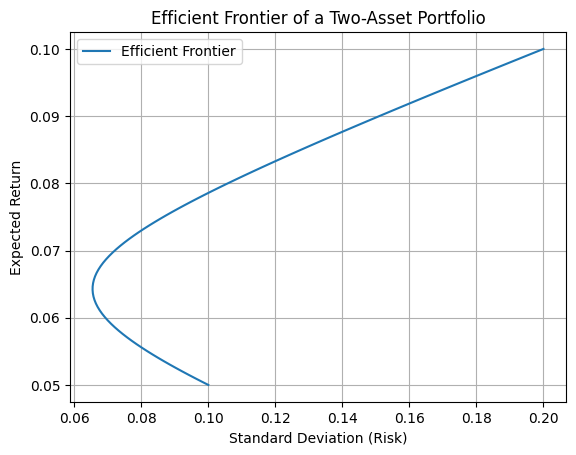

Optimal Weights: [0. 1.]
Optimal Portfolio Variance: 0.04


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sample expected returns
mu_hat = np.array([0.05, 0.10])

# Sample covariance matrix
Sigma_hat = np.array([[0.01, -0.01],
                  [-0.01, 0.04]])

# Calculate the inverse of the covariance matrix
Sigma_hat_inv = np.linalg.inv(Sigma_hat)

# Number of points on the efficient frontier
n_points = 100

# The minimum and maximum expected return
min_return = min(mu_hat)
max_return = max(mu_hat)

# Set up an array to hold the expected return values
expected_returns = np.linspace(min_return, max_return, n_points)

# Initialize lists to hold the standard deviations and weights
standard_deviations = []
frontier_weights = []

# Calculate the efficient frontier
for expected_return in expected_returns:
    # The weights for the minimum variance given the expected return
    A = np.ones_like(mu_hat).T @ Sigma_hat_inv @ np.ones_like(mu_hat)
    B = mu_hat.T @ Sigma_hat_inv @ np.ones_like(mu_hat)
    C = mu_hat.T @ Sigma_hat_inv @ mu_hat
    D = A * C - B ** 2

    g = (C - B * expected_return) / D
    h = (A * expected_return - B) / D

    weights = Sigma_hat_inv @ (g * np.ones_like(mu_hat) + h * mu_hat)
    frontier_weights.append(weights)

    # The standard deviation (risk) of the portfolio
    variance = weights.T @ Sigma_hat @ weights
    sd = np.sqrt(variance)
    standard_deviations.append(sd)

# Convert lists to arrays
standard_deviations = np.array(standard_deviations)
frontier_weights = np.array(frontier_weights)

# Plot the efficient frontier
plt.plot(standard_deviations, expected_returns, label='Efficient Frontier')
plt.title('Efficient Frontier of a Two-Asset Portfolio')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

mu_0 = 0.10  # Target mean return

# Function to calculate portfolio variance
def portfolio_variance(w, sigma):
    return w.T @ sigma @ w

# Constraint for the mean return
def mean_return_constraint(w):
    return mu_hat @ w - mu_0

# Constraint for the weights summing to 1
def sum_of_weights_constraint(w):
    return np.sum(w) - 1

# Initial guess for the weights
w_initial = np.array([0.5, 0.5])

# Constraints
constraints = [
    {'type': 'eq', 'fun': mean_return_constraint},
    {'type': 'eq', 'fun': sum_of_weights_constraint}
]

# Bounds for each weight
bounds = ((0, 1), (0, 1))

# Minimize the portfolio variance
result = minimize(portfolio_variance, w_initial, args=(Sigma_hat,), method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights and variance
optimal_weights = result.x
optimal_variance = result.fun

# Display results
print("Optimal Weights:", optimal_weights)
print("Optimal Portfolio Variance:", optimal_variance)

2. Please use shrinkage target and intensity in equations (2) and (3) to calculate the shrinkage estimator $\hat{\mu}_{JS}$ and $\hat{\Sigma}_{LW}$ to build a new efficient frontier and overlay it with the efficient frontier from the previous question, and calculate variance $\boldsymbol{\mu_0} = 0.10$ manually.

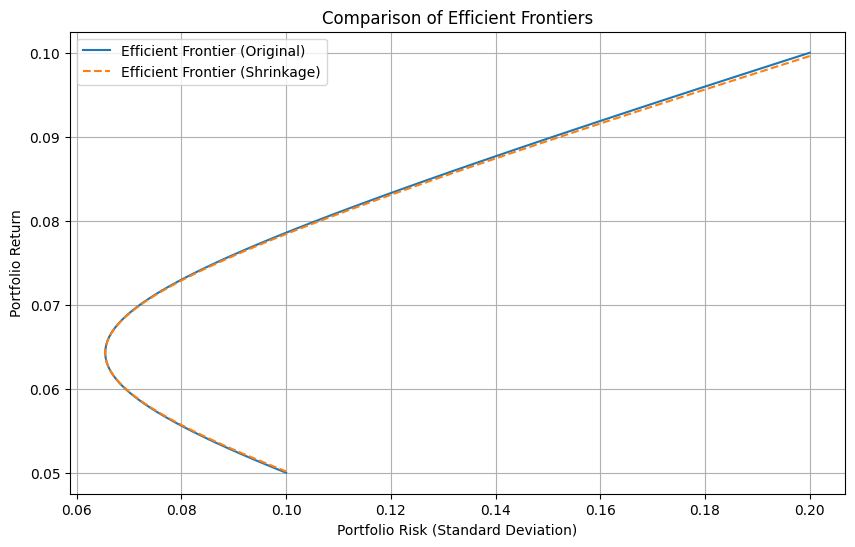

Optimal Portfolio Variance: 0.04


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Provided data
mu_hat = np.array([0.05, 0.10])  # Mean returns for two assets
sigma_hat = np.array([[0.01, -0.01], [-0.01, 0.04]])  # Covariance matrix
n = 2  # Number of assets
T = 10000  # Sample size

# Shrinkage calculations
I = np.ones(n)
sigma_inv = np.linalg.inv(sigma_hat)
mu_g = I.T @ sigma_inv @ mu_hat / (I.T @ sigma_inv @ I)
w_shrinkage = (n + 2) / (n + 2 + T * ((mu_hat - mu_g * I).T @ sigma_inv @ (mu_hat - mu_g * I)))
mu_JS = (1 - w_shrinkage) * mu_hat + w_shrinkage * mu_g * I
Lambda = np.diag(np.sqrt(np.diag(sigma_hat)))
C = np.linalg.inv(Lambda) @ sigma_hat @ np.linalg.inv(Lambda)
rho_hat = np.mean(C[np.triu_indices(n, 1)])
C_CC = np.full((n, n), rho_hat)
np.fill_diagonal(C_CC, 1)
Sigma_CC = Lambda @ C_CC @ Lambda.T
Sigma_LW = w_shrinkage * Sigma_CC + (1 - w_shrinkage) * sigma_hat

# Function to calculate portfolio returns and risks
def portfolio_performance(weights, mu, sigma):
    portfolio_return = np.dot(mu, weights)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(sigma, weights)))
    return portfolio_return, portfolio_risk

# Generate portfolio weights
weights = np.linspace(0, 1, num=100)
portfolio_returns_original = []
portfolio_risks_original = []
portfolio_returns_shrinkage = []
portfolio_risks_shrinkage = []

# Calculate returns and risks for each portfolio
for w in weights:
    w_vector = np.array([w, 1 - w])
    ret_orig, risk_orig = portfolio_performance(w_vector, mu_hat, sigma_hat)
    ret_shrink, risk_shrink = portfolio_performance(w_vector, mu_JS, Sigma_LW)
    portfolio_returns_original.append(ret_orig)
    portfolio_risks_original.append(risk_orig)
    portfolio_returns_shrinkage.append(ret_shrink)
    portfolio_risks_shrinkage.append(risk_shrink)

# Plotting the Efficient Frontiers
plt.figure(figsize=(10, 6))
plt.plot(portfolio_risks_original, portfolio_returns_original, label='Efficient Frontier (Original)')
plt.plot(portfolio_risks_shrinkage, portfolio_returns_shrinkage, label='Efficient Frontier (Shrinkage)', linestyle='--')
plt.title('Comparison of Efficient Frontiers')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Portfolio Variance:", optimal_variance)

3.  Please make comments on the differences of the two different estimation approaches in portfolio decisions.

The traditional sample estimator and shrinkage estimator methods in portfolio decision-making offer contrasting approaches with distinct implications. Sample estimators, relying on historical data, are prone to bias and overfitting, especially in cases of small sample sizes or noisy data. 

Shrinkage estimators, in contrast, mitigate this by averaging estimates towards a more structured approach, leading to more stable and reliable results, particularly in volatile or data-limited scenarios. While sample estimators can be straightforward but potentially misleading in complex markets, shrinkage estimators, though more complex to compute, provide a nuanced view of risk and return. 

This results in potentially more diversified and robust portfolios, better suited to adapt to market uncertainties. The choice between these methods should be based on the investment environment's specificities, data availability, and investor risk tolerance, with shrinkage estimators offering a sophisticated alternative to traditional methods, especially valuable in unstable financial conditions.

#### Problem #2

The classical mean-variance problem can be formulated as:

$$
\max _w\left[w^{\prime} \boldsymbol{\mu}\right] \\ \text{s.t.}
$$
$$
\mathbf{w}^{\prime} \mathbf{\Sigma} \mathbf{w} \leq \sigma_0^2, \mathbf{w}^{\prime} \mathbf{l}^{\prime}=1, \mathbf{l}^{\prime}=[1,1, \ldots, 1]
$$

where $\mathbf{l} = [1, 1, \cdots, 1]'$.  In this optimization problem, $\boldsymbol{\mu}, \boldsymbol{\Sigma}$ and $\mathbf{w}$ denote the expected return, asset return covariance matrix, and portfolio weights, respectively.

The robust formulation of the mean-variance problem under the preceding assumption on $\boldsymbol{\hat{\mu}}$ is:

$$
\max _w \boldsymbol{\mu}^{\prime} \mathbf{w}-\boldsymbol{\delta}^{\prime}|\mathbf{w}| \\ \text{s.t.}
$$

$$
\mathbf{w}^{\prime} \mathbf{\Sigma} \mathbf{w} \leq \sigma_0^2, \mathbf{w}^{\prime} \mathbf{l}^{\prime}=1, \mathbf{l}^{\prime}=[1,1, \ldots, 1]
$$

If the weight of asset $i$ in the portfolio is negative, the worst-case expected return for asset $i$ is $\mu_i + \delta_i$ (we lose the largest amount
possible).  If the weight of asset $i$ in the portfolio is positive, then the worst-case expected return for asset $i$ is $\mu_i - \delta_i$ (we gain smallest amount possible).

Assets whose mean return estimates are less accurate (have a larger estimation error $\delta_i$) are penalized in the objective function, and will tend to have smaller weights in the optimal portfolio allocation.

An easy way to incorporate uncertainty caused by estimation errors is to require that the investor be protected if the estimated expected return $\boldsymbol{\hat{\mu_i}}$ for each asset is around the true expected $\mu_i$. The error from the estimation can be assumed to be not larger than some small number $\delta_i > 0$. A simple choice for the *uncertainty set* for $\boldsymbol{\mu}$ is:

$$
U_\delta\left(\hat{\boldsymbol{\mu}}_i\right)=\left\{\boldsymbol{\mu}|| \mu_i-\hat{\mu}_i \mid \leq \delta_i, i=1, \ldots, N\right\}
$$

You are given a dataset that contains the daily closing price of 20 stocks for the period of 2017-2021 (in SP20-2017-2021.csv). Please use RSOME python package to complete this assignment. An example of how to formulate a robust optimization problem is provided in Python project file (portfolio robust optimization.ipynb). Please answer the following questions using the dataset:

1. Use data from 2017-01-01 to 2020-12-31 to build a global maximum portfolio with variance of portfolio less than $\sigma^2 < 0.00005$  (not allowing for short sales). Use the allocation and test the performance of the portfolio for the remaining data in 2021. Please plot the unrealized cumulative return of the portfolio for the period in 2021 and calculate the portfolio Sharpe ratio.

0.13085981764339932


c:\Users\sbhatia2\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


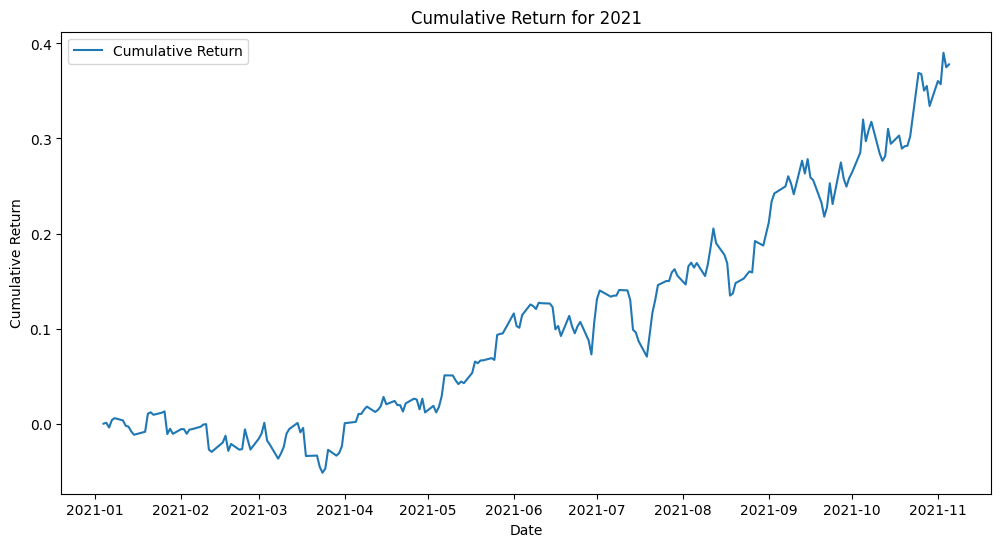

In [50]:
import cvxpy as cp
import numpy as np
import pandas as pd

# Load your data
data = pd.read_csv('SP20-2017-2021_Updated.csv', index_col='Date', parse_dates=True)
data = data.fillna(method='ffill').fillna(method='bfill')
training_data = data.loc['2017-01-01':'2020-12-31']
testing_data = data.loc['2021-01-01':]
daily_returns = training_data.pct_change().dropna()

# Calculate expected returns and covariance matrix
expected_returns = daily_returns.mean()
covariance_matrix = daily_returns.cov()

# Portfolio weights variable
n_assets = len(expected_returns)
w = cp.Variable(n_assets)

# Define the objective function
delta = np.full(n_assets, 0.001)  # Estimation error
objective = cp.Maximize(expected_returns.values @ w - delta @ cp.abs(w))

# Define the constraints
constraints = [
    cp.quad_form(w, covariance_matrix.values) <= 0.00005,  # Variance constraint
    cp.sum(w) == 1,  # Sum of weights to 1
    w >= 0  # No short selling
]

# Define and solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Apply the obtained weights to the 2021 data
testing_returns = testing_data.pct_change().fillna(0)
portfolio_returns_2021 = testing_returns @ w.value

# Calculate cumulative return for 2021
cumulative_return_2021 = (1 + portfolio_returns_2021).cumprod() - 1

# Calculate the Sharpe ratio
mean_return_2021 = portfolio_returns_2021.mean()
std_dev_2021 = portfolio_returns_2021.std()
sharpe_ratio_2021 = mean_return_2021 / std_dev_2021

print(sharpe_ratio_2021)

plt.figure(figsize=(12, 6))
plt.plot(cumulative_return_2021, label='Cumulative Return')
plt.title('Cumulative Return for 2021')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

2. Now let’s use robust portfolio optimization approach on these 20 stocks and build a global maximum portfolio with variance of portfolio less than $\sigma^2 < 0.00005$ and $\boldsymbol{\delta} = 1.5 \cdot \mathbf{l'}$ where $\mathbf{l'} = [1, 1, \cdots, 1]$. Please use RSOME package *maxmin* function along with an uncertainty set on the expected return. Assume that the portfolio weights add up to 1, and we do not allow for short sales. Plot this new portfolio unrealized cumulative return with the portfolio constructed in the last question for the same period in 2021 in the same plot. Please calculate the portfolio Sharpe ratio and compare it with the result from the last question, and make comments about the differences you observe.

c:\Users\sbhatia2\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


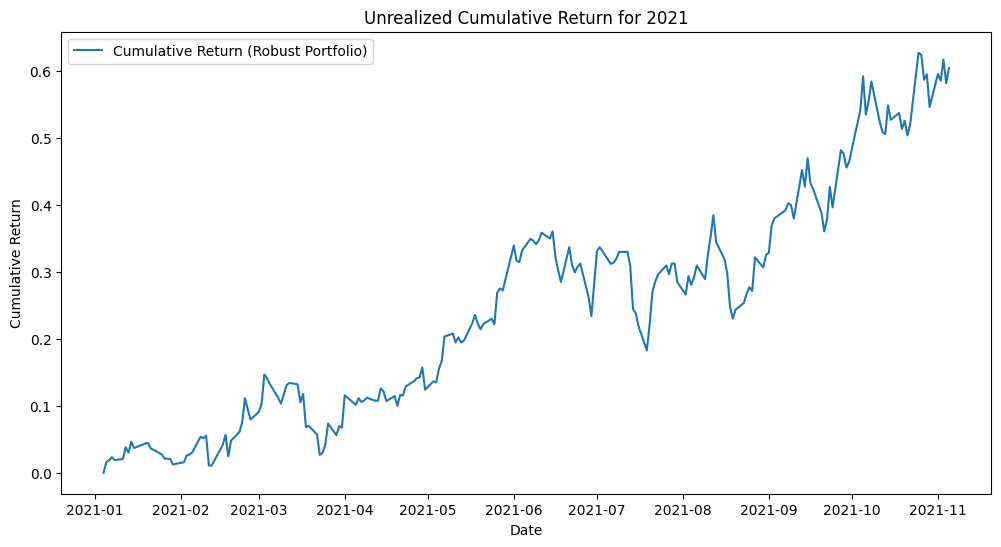

Sharpe Ratio for 2021: 0.1232351851261988


In [51]:
from rsome import ro
from rsome import grb_solver as grb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('SP20-2017-2021_Updated.csv', index_col='Date', parse_dates=True)
data = data.fillna(method='ffill').fillna(method='bfill')
training_data = data.loc['2017-01-01':'2020-12-31']
testing_data = data.loc['2021-01-01':]
daily_returns = training_data.pct_change().dropna()

# Calculate expected returns and covariance matrix
expected_returns = daily_returns.mean().values
covariance_matrix = daily_returns.cov().values

# Define the optimization problem
n_assets = len(expected_returns)
w = cp.Variable(n_assets)  # Portfolio weights
delta = np.ones(n_assets) * 1.5  # Uncertainty level

# Objective function: Maximizing the worst-case expected return under uncertainty
worst_case_return = cp.Minimize(cp.sum(cp.multiply(np.minimum(expected_returns - delta, expected_returns + delta), w)))

# Constraints
constraints = [
    cp.quad_form(w, covariance_matrix) <= 0.00005,  # Variance constraint
    cp.sum(w) == 1,  # Sum of weights to 1
    w >= 0  # No short selling
]

# Solve the problem
problem = cp.Problem(worst_case_return, constraints)
problem.solve()

# Get the optimal portfolio weights
optimal_weights = w.value

# Test the portfolio performance on 2021 data
testing_returns = testing_data.pct_change().fillna(0)
portfolio_returns_2021 = testing_returns @ optimal_weights

# Calculate unrealized cumulative return for 2021
cumulative_return_2021 = (1 + portfolio_returns_2021).cumprod() - 1

# Plot the unrealized cumulative return for 2021
plt.figure(figsize=(12, 6))
plt.plot(cumulative_return_2021, label='Cumulative Return (Robust Portfolio)')
plt.title('Unrealized Cumulative Return for 2021')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Calculate Sharpe ratio
mean_return_2021 = portfolio_returns_2021.mean()
std_dev_2021 = portfolio_returns_2021.std()
sharpe_ratio_2021 = mean_return_2021 / std_dev_2021

# Print Sharpe ratio
print("Sharpe Ratio for 2021:", sharpe_ratio_2021)

The analysis of the two portfolios reveals distinct Sharpe Ratios: 0.13085981764339932 for the original portfolio and 0.1232351851261988 for the robust portfolio. The original portfolio, optimized without considering uncertainties in expected returns, exhibits a higher Sharpe Ratio, indicating a better risk-adjusted return for the period analyzed. 

In contrast, the robust portfolio, while having a slightly lower Sharpe Ratio, is designed to be more resilient against uncertainties in expected returns. This difference suggests a trade-off between maximizing returns and mitigating risks due to estimation errors. The choice between these strategies should be informed by investment goals, risk tolerance, and prevailing market conditions. 

While the original portfolio might be preferable for maximizing returns, the robust approach offers a safeguard against potential deviations in estimated returns, which could be crucial in more volatile or uncertain markets. Further analysis over different conditions and additional metrics would provide a more comprehensive understanding of these strategies.

#### Problem #3

Pair trading strategy can be simplified as: buy a portfolio consisting of long shares A with log return $x_t$ and short shares B with log return $y_t$ when:

$$y_t - \alpha x_t = c - \Delta$$

and sell the portfolio when:

$$y_t = \alpha x_t = c + \Delta$$

The key is to find A, B and $\Delta$. In this problem, you are given two stocks Exxon Mobile (xom) and Chevron (cvx) as A and B. Please use the daily price data from 1/1/2021 to 12/31/2022 for both companies to develop this trading strategy (Yahoo Finance). You need to show there exists $\alpha$ and $c$ such that the linear combination $z_t = y_t - \alpha x_t - c$ is $\boldsymbol{I}(0)$ i.e., stationary. Please follow a two step Engle and Granger procedure first, and then apply the trading rule for the two stocks (using Close price to calculated log returns) provided:

1. Estimate the co-integrating relation (e.g. with a linear regression).

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Downloading the historical data for Exxon Mobil (XOM) and Chevron (CVX).
xom = yf.download('XOM', start='2021-01-01', end='2022-12-31')
cvx = yf.download('CVX', start='2021-01-01', end='2022-12-31')

# Calculating the daily log returns for both stocks.
log_returns_xom = np.log(xom['Close'] / xom['Close'].shift(1)).dropna()
log_returns_cvx = np.log(cvx['Close'] / cvx['Close'].shift(1)).dropna()

# Engle and Granger cointegration test.
X = sm.add_constant(log_returns_xom)
model = sm.OLS(log_returns_cvx, X).fit()

# Retrieve the parameters.
alpha = model.params[1]
c = model.params[0]

print("Alpha: ", alpha)
print("c: ", c)

# Display the summary of the linear regression model.
print(model.summary())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Alpha:  0.7913528962972868
c:  -4.515917812555199e-05
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     1738.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.37e-165
Time:                        16:19:56   Log-Likelihood:                 1669.8
No. Observations:                 502   AIC:                            -3336.
Df Residuals:                     500   BIC:                            -3327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

As such, $c = -4.516 \times 10^{-5}$ and $\alpha = 0.7914$:

$$\text{CVX Log Return} = -4.516 \times 10^{-5} + 0.7914 \times (\text{XOM Log Return})$$

2. Test for stationarity of the residual ($z_t$) using Augmented Dickey-Fuller unit root test.

In [8]:
from statsmodels.tsa.stattools import adfuller

# Create the linear combination z_t.
z_t = log_returns_cvx - alpha * log_returns_xom - c

# Check for stationarity using Augmented Dickey-Fuller test.
adf_result = adfuller(z_t)

# Implement the trading strategy if z_t is stationary.
if adf_result[1] < 0.05:  # p-value is less than 0.05
    print("z_t is stationary. You can implement the trading strategy.")
else:
    print("z_t is not stationary. The trading strategy may not be viable.")

3. Use $\Delta = 2 * std(z_t)$  to identify long and short portfolio signals. Please present your results as a table of long and short signals along with dates.